### 1. 进行数据预处理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

In [4]:
x_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## 数据标准化，提高模型预测的准确度，并且加快收敛素的

In [5]:
x_train = x_train/255
x_test = x_test/255

In [6]:
y_trian_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [7]:
y_trian_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#### 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))


In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])

In [13]:
train_history = model.fit(x=x_train, y=y_trian_onehot,
                         validation_split=0.2,
                         epochs=20, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 4s - loss: 0.4434 - acc: 0.8813 - val_loss: 0.2193 - val_acc: 0.9399
Epoch 2/20
 - 1s - loss: 0.1916 - acc: 0.9452 - val_loss: 0.1562 - val_acc: 0.9550
Epoch 3/20
 - 1s - loss: 0.1359 - acc: 0.9616 - val_loss: 0.1263 - val_acc: 0.9641
Epoch 4/20
 - 1s - loss: 0.1031 - acc: 0.9705 - val_loss: 0.1128 - val_acc: 0.9678
Epoch 5/20
 - 1s - loss: 0.0813 - acc: 0.9776 - val_loss: 0.0988 - val_acc: 0.9713
Epoch 6/20
 - 1s - loss: 0.0663 - acc: 0.9814 - val_loss: 0.0938 - val_acc: 0.9718
Epoch 7/20
 - 1s - loss: 0.0546 - acc: 0.9849 - val_loss: 0.0912 - val_acc: 0.9737
Epoch 8/20
 - 1s - loss: 0.0459 - acc: 0.9878 - val_loss: 0.0831 - val_acc: 0.9763
Epoch 9/20
 - 1s - loss: 0.0381 - acc: 0.9900 - val_loss: 0.0824 - val_acc: 0.9753
Epoch 10/20
 - 1s - loss: 0.0317 - acc: 0.9918 - val_loss: 0.0799 - val_acc: 0.9769
Epoch 11/20
 - 1s - loss: 0.0262 - acc: 0.9937 - val_loss: 0.0781 - val_acc: 0.9763
Epoch 12/20
 - 1s - loss: 0.0219 - 

### 显示训练过程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

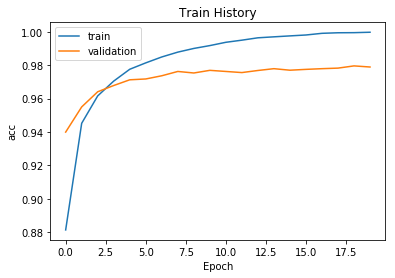

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

### 用测试数据评估模型准确路

In [16]:
scores = model.evaluate(x_test, y_test_onehot)
print('accuracy = ', scores[1])

10000/10000 [==============================] - 1s 52us/step
accuracy =  0.978


### 进行预测

In [17]:
prediction = model.predict_classes(x_test)

In [18]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap='binary')
        title = 'label=' + str(labels[idx])
        if len(prediction) > 0:
            title += ", predict = " + str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()        

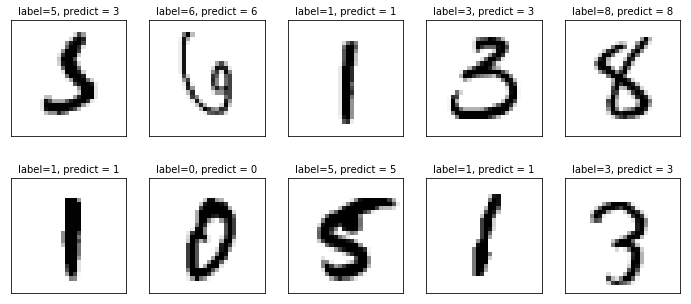

In [20]:
x_test_image = x_test.reshape(10000, 28, 28)
plot_images_labels_prediction(x_test_image, y_test, prediction, idx=340)

### describing confusion matrix / error matrix
If we want to know which handwritten-digital has a higher accuracy, the confusion matrix would help us to display them

In [21]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,0,1,0,1,0,4,1,3,0
1,0,1125,4,0,0,1,2,1,2,0
2,5,1,1011,0,0,0,2,5,7,1
3,0,0,5,986,0,3,0,6,4,6
4,3,1,3,1,953,0,3,4,1,13
5,2,0,0,11,1,866,4,2,4,2
6,5,3,2,1,3,3,941,0,0,0
7,0,2,7,2,0,0,0,1015,1,1
8,3,1,5,5,5,4,2,8,937,4


In [22]:
df = pd.DataFrame({'label': y_test, 'predict': prediction})
df[:3]

,label,predict
0,7,7
1,2,2
2,1,1


In [23]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2597,5,3
3117,5,3
3902,5,3
4271,5,3
4360,5,3
5937,5,3


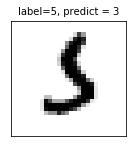

In [24]:
plot_images_labels_prediction(x_test_image, y_test, prediction, idx=340, num=1)

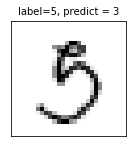

In [25]:
plot_images_labels_prediction(x_test_image, y_test, prediction, idx=4271, num=1)